# Always starting the work with **import**
Importing the necessary libraries for work.

**Matplotlib** – Basic plotting library for creating static charts in Python.

**pandas** – Library for data manipulation and analysis using DataFrames.

**Seaborn** – High-level library for statistical data visualization built on Matplotlib.

**sqlite3** – Python module to work with SQLite databases.

**matplotlib.gridspec** – Tool to create complex subplot layouts in Matplotlib.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.gridspec as gridspec

# CSV Reading
Reading the csv using `pd.read_csv`, showing the first 5 rows of the dataset with `df.head()`

In [ ]:
df=pd.read_csv("/content/Pizza Sales Dataset.csv")
print(df.head())

   pizza_id  order_id  pizza_name_id  quantity order_date order_day  \
0         1         1     hawaiian_m         1   1/1/2015  Thursday   
1         2         2  classic_dlx_m         1   1/1/2015  Thursday   
2         3         2  five_cheese_l         1   1/1/2015  Thursday   
3         4         2    ital_supr_l         1   1/1/2015  Thursday   
4         5         2     mexicana_m         1   1/1/2015  Thursday   

  order_time  unit_price  total_price pizza_size pizza_category  \
0   11:38:36       13.25        13.25          M        Classic   
1   11:57:40       16.00        16.00          M        Classic   
2   11:57:40       18.50        18.50          L         Veggie   
3   11:57:40       20.75        20.75          L        Supreme   
4   11:57:40       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2 

# SQL Connection
Connecting to a sqlite3 server with `sqlite3.connect(":memory:")`, converting the dataset to an sql query so i can work with it in sql.

In [ ]:
conn=sqlite3.connect(":memory:")
df.to_sql("pizza", conn, index=False, if_exists="replace")

48620

# The work with SQL

## Creating queries
Creating 3 queries:

The first one counts the total orders for each day using aggregate function `COUNT` and `GROUP BY`.

The second one counts the orders for each size for monday, again using `COUNT` and `GROUP BY`. Choosing only Mondays with `WHERE`.

The third one does the same thing as the second, but chooses only Fridays.

## Converting back to a DataFrame
Now, converting the queries back to dataframes so i can freely visualise them with `pd.read_sql_query`.

In [ ]:
query_sum_days="""
SELECT
    COUNT(order_id) AS orders,
    order_day AS day
FROM pizza
GROUP BY order_day
ORDER BY day
"""

query_size_monday="""
SELECT
   COUNT(order_id) AS orders,
   pizza_size AS size,
   order_day AS day
FROM pizza
WHERE order_day IN ("Monday")
GROUP BY order_day, size
"""
query_size_friday="""
SELECT
   COUNT(order_id) AS orders,
   pizza_size AS size,
   order_day AS day
FROM pizza
WHERE order_day IN ("Friday")
GROUP BY order_day, size
"""
data1=pd.read_sql_query(query_sum_days, conn)
print(data1)
data2=pd.read_sql_query(query_size_monday, conn)
print(data2)
data3=pd.read_sql_query(query_size_friday, conn)
print(data3)

   orders        day
0    8106     Friday
1    6369     Monday
2    7355   Saturday
3    5917     Sunday
4    7323   Thursday
5    6753    Tuesday
6    6797  Wednesday
   orders size     day
0    2427    L  Monday
1    2051    M  Monday
2    1822    S  Monday
3      66   XL  Monday
4       3  XXL  Monday
   orders size     day
0    3153    L  Friday
1    2528    M  Friday
2    2328    S  Friday
3      95   XL  Friday
4       2  XXL  Friday


# Setting up and creating plots and charts
## Setting up the figure and style
First, I set up the figure size so all the labels and values can be seen. I use `plt.figure(plt.figsize=(12.8))`

Second, i create a 2x2 grid with gridspec and create 3 axes, two at the top and one at the bottom.

Third, i set up the theme with `sns.set_theme(style="whitegrid")`.

## Creating the bars and pies
Creating 2 barplots at the top with `sns.barplot`, hueing by size of pizza, setting the deep palette so it gives more colourful colors, adding edge color so the bars can be more stylish.

Finally, creating a pie chart, setting up the starting angle, adding `explode` so it canbe more like slices and more stylish, adding the shadow.

Tightening up the layout with `plt.tight_layout`

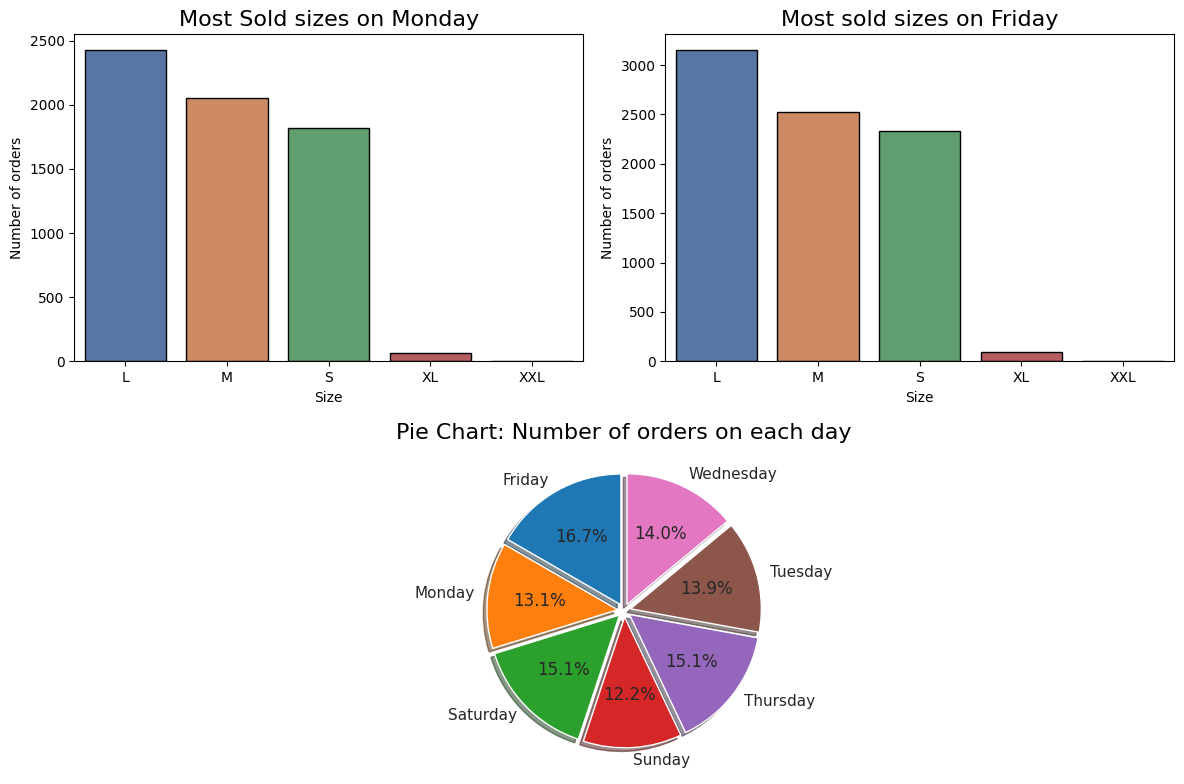

In [ ]:
fig=plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.set_theme(style="whitegrid")
sns.barplot(data=data2, x="size", y="orders", hue="size", palette="deep",edgecolor="black", linewidth=1, ax=ax1)
ax1.set_title("Most Sold sizes on Monday", fontsize=16)
ax1.set_xlabel("Size")
ax1.set_ylabel("Number of orders")

sns.barplot(data=data3, x="size", y="orders", hue="size", palette="deep",edgecolor="Black", linewidth=1, ax=ax2)
ax2.set_title("Most sold sizes on Friday", fontsize=16)
ax2.set_xlabel("Size")
ax2.set_ylabel("Number of orders")

explode = [0.05] * len(data1)
ax3.pie(data1["orders"], labels=data1["day"], autopct="%1.1f%%", startangle=90, explode=explode, shadow=True)
ax3.set_title("Pie Chart: Number of orders on each day", fontsize=16)


plt.tight_layout()
plt.show()